# Linear Regression — Level 2: scikit-learn

In this notebook, you will re-implement linear regression using **scikit-learn** and compare the results with your Level 1 (from-scratch) implementation.

### Key scikit-learn Classes

| Class/Function | Purpose |
|---------------|--------|
| `LinearRegression` | Fits a linear model using Ordinary Least Squares (closed-form) |
| `model.fit(X, y)` | Train the model |
| `model.predict(X)` | Make predictions |
| `model.coef_` | Learned weights (after fitting) |
| `model.intercept_` | Learned bias (after fitting) |
| `mean_squared_error(y, y_pred)` | Compute MSE |
| `r2_score(y, y_pred)` | Compute R² (1.0 = perfect fit) |

### Important Note
scikit-learn expects X to be **2D**: shape `(m, n_features)`. For single-feature data, reshape with `X.reshape(-1, 1)`.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

## 2.1 Generate the Same Synthetic Data

We use the same data as Level 1 so we can directly compare results.

True relationship: $y = 3x + 7 + \text{noise}$

In [2]:
m = 1000
X_train = 2 * np.random.rand(m)
y_train = 3 * X_train + 7 + np.random.randn(m) * 0.5

# scikit-learn expects X to be 2D: shape (m, n_features)
X_train_2d = X_train.reshape(-1, 1)

print(f"X_train shape:    {X_train.shape}     (1D — for plotting)")
print(f"X_train_2d shape: {X_train_2d.shape}  (2D — for scikit-learn)")

X_train shape:    (1000,)     (1D — for plotting)
X_train_2d shape: (1000, 1)  (2D — for scikit-learn)


## 2.2 Fit the Model

Create a `LinearRegression` model, fit it, and extract the learned parameters.

In [4]:
# TODO: Create a LinearRegression model and fit it
# Step 1: Create the model instance
# Step 2: Call model.fit(X_train_2d, y_train)
# Step 3: Extract the weight from model.coef_[0]
# Step 4: Extract the bias from model.intercept_

model = LinearRegression()
model.fit(X_train_2d, y_train)


sklearn_w = model.coef_[0]
sklearn_b = model.intercept_

print(f"scikit-learn learned: w = {sklearn_w:.4f}, b = {sklearn_b:.4f}")
print(f"True values:          w = 3.0000, b = 7.0000")
print(f"Your Level 1 result:  w ≈ 2.9920, b ≈ 6.9987")

scikit-learn learned: w = 2.9613, b = 7.0874
True values:          w = 3.0000, b = 7.0000
Your Level 1 result:  w ≈ 2.9920, b ≈ 6.9987


## 2.3 Make Predictions and Evaluate

Use the trained model to predict, then measure how well it fits using MSE and R².

In [5]:
# TODO: Make predictions and compute metrics
# Step 1: Use model.predict(X_train_2d) to get predictions
# Step 2: Compute MSE using mean_squared_error(y_train, y_pred)
# Step 3: Compute R² using r2_score(y_train, y_pred)

y_pred = model.predict(X_train_2d)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score:           {r2:.4f}")

Mean Squared Error: 0.2437
R² Score:           0.9246


## 2.4 Visualize: Compare Level 1 vs Level 2

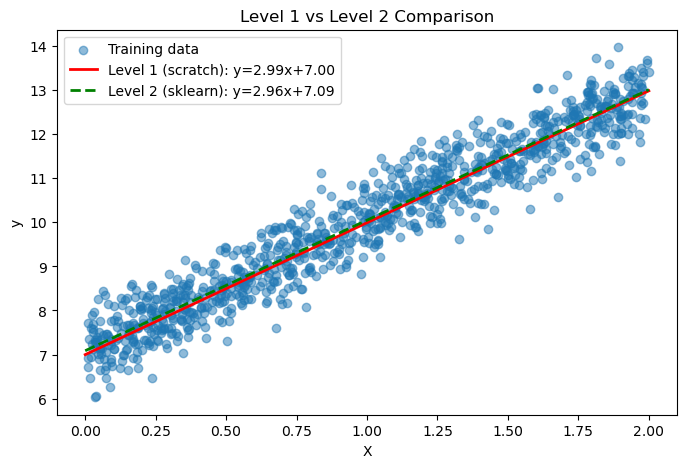

In [6]:
# Your Level 1 results (from the previous notebook)
level1_w, level1_b = 2.9920, 6.9987

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, alpha=0.5, label="Training data")

x_line = np.linspace(0, 2, 100)
plt.plot(
    x_line,
    level1_w * x_line + level1_b,
    color="red",
    linewidth=2,
    label=f"Level 1 (scratch): y={level1_w:.2f}x+{level1_b:.2f}",
)
plt.plot(
    x_line,
    sklearn_w * x_line + sklearn_b,
    color="green",
    linewidth=2,
    linestyle="--",
    label=f"Level 2 (sklearn): y={sklearn_w:.2f}x+{sklearn_b:.2f}",
)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Level 1 vs Level 2 Comparison")
plt.legend()
plt.show()

## Reflection Questions

Answer these in the markdown cell below:

1. How close are your Level 1 parameters to the scikit-learn results? Why might they differ?
2. What happens if you change the learning rate in Level 1 to 0.01? To 1.0?
3. What happens if you increase the number of iterations in Level 1 to 10000?
4. scikit-learn uses **Ordinary Least Squares** (closed-form solution), not gradient descent. What are the trade-offs?

*Your answers here...*

---

## Next Steps

Level 2 complete! Continue to:
- **Level 3**: `linear_regression_real_world.ipynb` — Apply to the California Housing dataset with production-style code